# 3. Polynomial Regression

## 공부시간에 따른 시험 점수(영재반)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

## 3-1. 단순 선형 회귀(Simple Linear Regression)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y) #전체데이터 학습

LinearRegression()

## 데이터 시각화(전체)

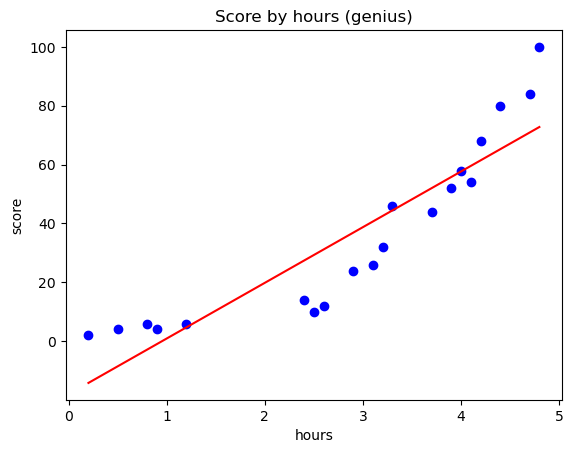

In [38]:
plt.scatter(X,Y,color = 'blue')
plt.plot(X,reg.predict(X),color='red')
plt.title("Score by hours (genius)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [22]:
reg.score(X,Y)

0.8169296513411765

## 3-2. 다항회귀(Polynomial Regression)

In [91]:
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree=4) #2차 다항식
X_poly = poly_reg.fit_transform(X)
X_poly[:5]

#[X] -> [X^0,X^1,X^2] -> X 가 3이라면 [1,3,9]
#밑에 코드의 결과와 다른이유(확장되서 보이는 이유)->현재 코드에선 degree= 2로 2차다항식으로 되있기 때문에
#1. , 0.2, 0.04 는 각각 결과의 0승 ,1승 ,2 승이다. 2차로 표현되어서 나온 것.

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [92]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [93]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [94]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y) #변환된 X와Y 을 가지고 모델 생성 (학습)

LinearRegression()

## 데이터 시각화(변환된 X와 Y)

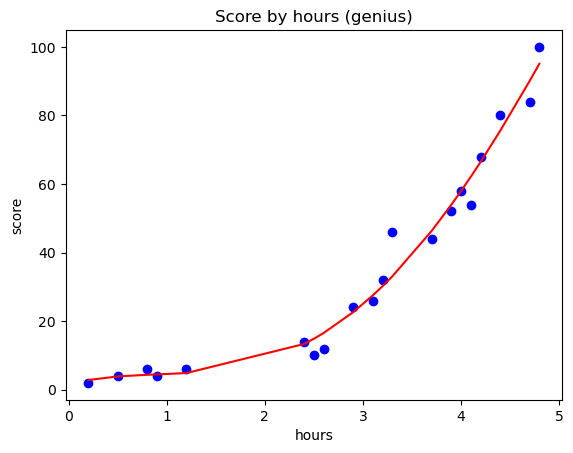

In [95]:
plt.scatter(X,Y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.transform(X)),color='red')
plt.title("Score by hours (genius)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [96]:
X_range = np.arange(min(X),max(X),0.1) #X의 최소값에서 최대값까지의 범위를0.1단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [97]:
X_range.shape

(46,)

In [98]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [99]:
X.shape

(20, 1)

In [100]:
X_range = X_range.reshape(-1,1)  #row 개수는 자동으로 계산,column 개수는 1개
#X_range.reshape(len(X_range),1)로 해도됨.
X_range.shape

(46, 1)

In [101]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

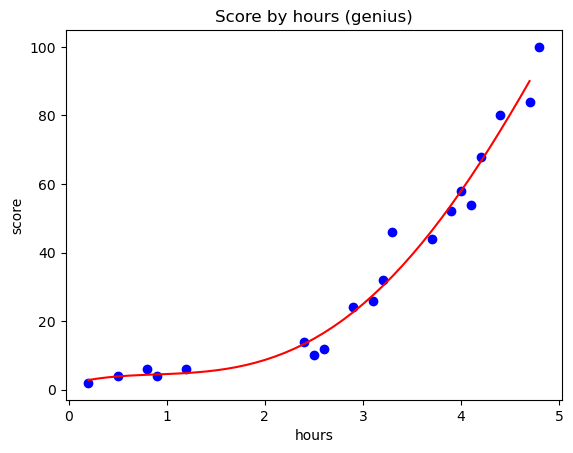

In [102]:
plt.scatter(X,Y,color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.transform(X_range)),color='red')
plt.title("Score by hours (genius)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 공부시간에 따른 시험 성적 예측

In [103]:
reg.predict([[2]]) #2시간을 공부했을 때 선형회귀 모델의 예측

array([19.85348988])

In [104]:
lin_reg.predict(poly_reg.fit_transform([[2]])) #2시간을 공부했을 떄 다항 회귀 모델의 예측

array([8.70559135])

In [105]:
lin_reg.score(X_poly,Y)

0.9782775579000045